## Work with phantom camera data


In [1]:
%matplotlib inline
import cmod_functions as cmod

We use `generate_phantom_dataset` to download phantom camera data of a specific shot. The data is returned as an xarray dataset. We can specify the time window of interest by choosing`time_start` and `time_end`. 

R and Z coordinates will be downloaded if the data is avaliable. (Note to myself: Check with Jim whether the data is stored somewhere else in older shots)

In [2]:
ds = cmod.generate_phantom_dataset(1110114011, time_start=0.95, time_end=0.9505)
ds

<xarray.Dataset>
Dimensions:  (time: 195, y: 64, x: 64)
Coordinates:
    R        (y, x) float32 91.8 91.71 91.61 91.52 ... 86.48 86.39 86.29 86.2
    Z        (y, x) float32 -6.15 -6.148 -6.147 -6.145 ... 0.1968 0.1984 0.2
  * time     (time) float64 0.95 0.95 0.95 0.95 ... 0.9505 0.9505 0.9505 0.9505
Dimensions without coordinates: y, x
Data variables:
    frames   (time, y, x) uint16 71 83 76 77 83 100 83 ... 95 103 68 82 93 74
Attributes:
    shot_number:  1110114011

We can use xarray opperations on the dataset such as calculating the radial profile and plotting it.

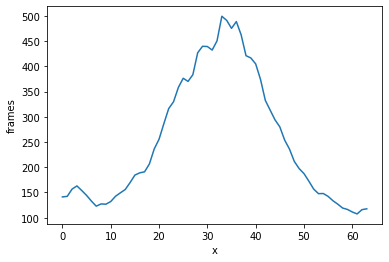

In [3]:
ds['frames'].mean(dim=('time','y')).plot()

The position of the LCFS and the limiter shadow can be calculated and plotted using the phantom dataset accessor as shown below. The input argument is the index of time array.

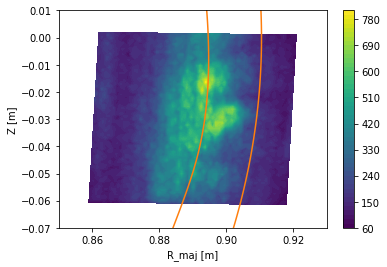

In [6]:
ds.phantom.plot(0)

We can easily turn the dataset into an animation using the `xmovie` package. `xmovie` is installed with:

In [22]:
conda install -c conda-forge xmovie

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Keep in mind that creating animations out of big datasets takes a long time. We only use the first 30 frames in this case to save space on the Github repository.

In [17]:
import xmovie
short_ds = ds.isel(time=slice(0,30))

mov = xmovie.Movie(short_ds['frames'].astype(int))
mov.save('phantom_camera_data.mp4')

/home/gdecrist/anaconda3/envs/phantom/lib/python3.8/site-packages/xmovie/core.py:46: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  warnings.warn(
/home/gdecrist/anaconda3/envs/phantom/lib/python3.8/site-packages/xmovie/core.py:53: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  warnings.warn(


Movie created at phantom_camera_data.mp4


The created animation can be displayed with:

In [25]:
from IPython.display import Video
Video("phantom_camera_data.mp4")